# Simulation de réseaux

**Enzo PETIT ‑ Nam VU**

2SN-A - 2021-2022


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Modèles simples de réseaux à commutation de paquets

### Simulation de files M/M/1, M/D/1

> Avec $\mu = 33$

#### File M/M/1

![](img/mm1.png)

$E[R]$ est une moyenne sur chaque paquet et elle est alors plus précise que $E[L]$ qui dépend du régime transitoire et donc de la durée de simulation.

#### File M/D/1

![](img/md1.png)

Les moyennes sont plus faibles que dans la file M/M/1 mais les intervalles de confiance sont tout aussi réduits.


### Simulation de files de taille finie



#### File M/M/1/K

Avec les paramètres de simulation suivants :

```perl
$lambda=22.0;
$mu=33.0;
$duration=1000.0; #sec
```


<AxesSubplot:xlabel='Capa. file'>

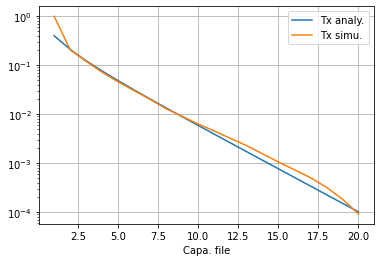

In [9]:
df = pd.read_csv('../Code_TP1_2019_2020/MM1K/MM1Klambda22.csv', index_col=0, skiprows=1)
df.plot(logy=True, grid=True)

On observe que les résultats de la simulation correspondent aux résultats analytiques.

#### File M/D/1/K

<!-- commenter 22 et 23\
decommenter 24\
ligne 46 : `set bytes [expr round ([$pktSize value])]` -> `set bytes [expr round ($pktSize)]`

`./rejet.pl > blabla.csv` -->

```perl
$lambda=20.0;
$mu=33.0;
$duration=10000.0; #sec
```


<AxesSubplot:xlabel='Capa. file'>

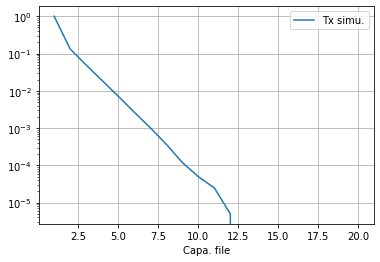

In [10]:
df = pd.read_csv('../Code_TP1_2019_2020/MM1K/MD1Kduration10000.csv', index_col=0, skiprows=1)
df.plot(y='Tx simu.', logy=True, grid=True)

Cette simulation est imcomplète, il faudrait ralonger la durée de simulation pour espérer saturer davantage la file...

### Simulation d’un système composé de deux noeuds de commutation

![](img/Capture%20d%E2%80%99%C3%A9cran%202022-06-05%20%C3%A0%2023.06.18.png)

En moyenne on attend $\frac{1}{\lambda} + \frac{1}{\mu}$

$E[R] = E[R_1] + E[R_2] = \frac{(2 - e)}{\mu^2(1-e)} + \frac{1}{\mu}$

## Méthodes d’accès Aloha

### Aloha pur

Hypothèses générales

- Infinité de sources
- Débit d'arrivée $\lambda$
- Toutes les trans sont de même taille (durée d'émission T)
- Hypothèses : en cas de collision toutes les trans sont inexploitable

Méthode Aloha pur

- Pas d'écoute du support
- On néglige les erreurs
- A la fin de la transmission la station sait s'il y a collision
- En cas de collision il y a une attente d

$\Lambda = \gamma P_{succès} = \gamma e^{-2 \gamma T}$

$G = \gamma T = \rho_0$ charge offerte

$\rho_s = \Lambda T$

Charge offerte de 0.5 $\rightarrow$ maximum de 0.18


#### 1ère simulation

On fixe ces valeurs de paramètre et faisons varier `idle_time_`.

```tcl
# Global configuration parameters for Aloha (also settable in ns-sat.tcl)
Mac/Sat/UnslottedAloha set mean_backoff_ 1s ; # mean exponential backoff time(s) TODO:
Mac/Sat/UnslottedAloha set rtx_limit_ 3; # max number of retrans. attempted  TODO:
Mac/Sat/UnslottedAloha set send_timeout_ 270ms; # resend if send times out TODO: ici ?

set opt(qlim)		50		; #TODO:

$exp($a) set idle_time_ <variable>
```

Text(0, 0.5, '$\\rho_s$')

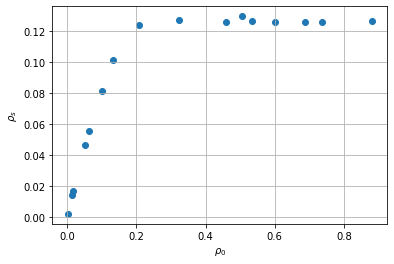

In [11]:
rho_0 = np.array([
    0.0174910388529732, 0.0143781480977282, 0.00179082786252704,
    0.207962751292275, 0.460490191274399, 0.534845334845335, 0.505927647421179,
    0.737783351133405, 0.881003924015696, 0.133100395807125, 0.100472238723575,
    0.063966063966064, 0.0517743005291238, 0.322011074188261, 0.686672580053221,
    0.599944798454357
])

rho_s = np.array([
    0.0168189528259617, 0.0139493261369187, 0.00177401257743289,
    0.123591548239417, 0.125944096714224, 0.126411726411726, 0.129512236097889,
    0.125849303397214, 0.126210504842019, 0.100936216851903, 0.0812598633087913,
    0.0553308553308553, 0.0460346726665379, 0.12740496588442, 0.126076734690612,
    0.126011928333993
])

plt.scatter(rho_0, rho_s)
plt.grid()
plt.xlabel(r'$\rho_0$')
plt.ylabel(r'$\rho_s$')

En faisant varier uniquement la taille max de la file, on remarque ici que $\rho_0$ et $\rho_s$ ne varient pas sensiblement passé un certain seuil.

On ne retrouve pas de forme en cloche : la durée du backoff est trop grande et "lisse" trop le trafic.

#### 2e simulation

La modification du temps moyen de backoff exponentiel a un impact conséquent sur les valeurs de charge du système.

Pour un backoff de 1s

```
99.9999 38496 0.658017537562176 0.476790603232096 5169 0.0812071890906806 0.0831814370432701 585.030585030585 636.720636720637 150.49015049015 0.491425691425691 0.534845334845335 0.126411726411726
time #drop %loss avr_%drop #coll %col avr_%coll thpt_a thpt_o thpt_s rho_a rho_o rho_s
```

Pour un backoff de 0.1s

```
99.9950 22697 0.480004229671143 0.306791737734342 14058 0.22917413843696 0.225322452609815 472.873643682184 613.460673033652 196.7198359918 0.397213860693035 0.515306965348267 0.165244662233112
time #drop %loss avr_%drop #coll %col avr_%coll thpt_a thpt_o thpt_s rho_a rho_o rho_s
```


#### 3e simulations

On utilise les paramètres de simulation suivants :

```tcl
# Global configuration parameters for Aloha (also settable in ns-sat.tcl)
Mac/Sat/UnslottedAloha set mean_backoff_ 0.001s ; # mean exponential backoff time(s) TODO:
Mac/Sat/UnslottedAloha set rtx_limit_ 3; # max number of retrans. attempted  TODO:
Mac/Sat/UnslottedAloha set send_timeout_ 270ms; # resend if send times out

set opt(qlim)		50		; #TODO:

$exp($a) set idle_time_ $::env(IDLE)
```

Nous avons écrit un script pour relever automatiquement et en parallèle des résultats de simulation :

In [12]:
import asyncio

import numpy as np
import matplotlib.pyplot as plt
from itertools import chain


async def test(idle: float):
    outfile = f'/tmp/res{idle}.tr'
    proc = await asyncio.create_subprocess_shell("ns ../sat-aloha.tcl poisson",
                                                 shell=True,
                                                 env={
                                                     'IDLE': str(idle),
                                                     'OUTFILE': outfile
                                                 })
    await proc.communicate()
    proc = await asyncio.create_subprocess_shell(f"perl loss.pl {outfile}",
                                                 shell=True,
                                                 stdout=asyncio.subprocess.PIPE)
    stdout, _ = await proc.communicate()
    rho_0, rho_s = stdout.decode().splitlines()[-1].split()[-2:]
    print(idle, rho_0, rho_s)
    return float(rho_0), float(rho_s)


async def main():
    res = await asyncio.gather(
        *(test(i)
          for i in chain(np.arange(0.01, 0.3, 0.01), np.arange(0.3, 5, 0.1))))
    with open('res.txt', 'w') as f:
        for rho_0, rho_s in res:
            print(rho_0, rho_s, file=f)
    rho_0s, rho_ss = zip(*res)
    plt.scatter(rho_0s, rho_ss)
    plt.grid()
    plt.xlabel(r'$\rho_0$')
    plt.ylabel(r'$\rho_s$')
    plt.xlim(right=1)
    plt.show()

# A éxécuter dans Code_TP2_2019_2020/trace_Loss/
# asyncio.run(main())

Plot avec les résultats précédemment sauvegardés :

Text(0.5, 1.0, 'backoff 0.001s')

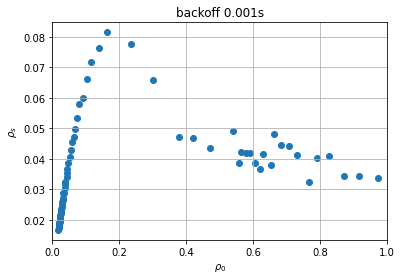

In [13]:
rho_0s = []
rho_ss = []
with open('../Code_TP2_2019_2020/trace_Loss/res.txt', 'r') as f:
    for l in f:
        rho_0, rho_s = l.split()
        rho_0s.append(float(rho_0))
        rho_ss.append(float(rho_s))
plt.scatter(rho_0s, rho_ss)
plt.grid()
plt.xlabel(r'$\rho_0$')
plt.ylabel(r'$\rho_s$')
plt.xlim(left=0, right=1)
plt.title('backoff 0.001s')


Avec une durée de backoff désormais très réduite on retrouve la forme en cloche attendue. 

Néanmoins le maximum de 0.18 n'est pas retrouvé à 0.5, indiquant que les paramètres choisis ne sont pas encore optimaux.

## Etude de la surcharge sur les réseaux d’accès sans fils

### Introduction

Les réseaux mobiles 4G et 5G utilisent la méthode d'accès Aloha.
Aloha est la méthode d'accès la plus triviale : Si je veux transmettre, alors je transmet.
Cela est pratique pour des terminaux mobiles ayant une quantité limitée d'énergie, qu'on souhaite donc éviter de dépenser sur la méthode d'accès.

Il existe également une version dite "slotté", où l'on ne peut transmettre qu'à certains intervalles de temps (donné par un autre canal du réseau). Cette version présente un meilleur débit que l'Aloha classique : 

![Aloha pur vs Aloha slotté](img/Comparaison_Aloha.png)


### Modélisation simple d’un réseau d’accès 4G

#### Abstraction couche physique

L'on considère un réseau où les utilisateurs emettent à une puissance suffisante pour être entendus par le point d'accès (l'eNB). 
L'on considère la méthode d'Aloha slotté (période $t_{slot}$), possédant $N_{codes}$ (= 54 ici) canaux orthogonaux.

L'on considère que chaque utilisateur choisi aléatoirement un canal parmis ceux disponibles. Alors chaque canal se comporte indépendamment des autres, avec une charge normalisée par le nombre de canaux.

#### Abstraction couche MAC

Pour faciliter le traitement analytique, on va également supposer des contraintes de temps assez fortes sur les communications entre les terminaux et l'eNB. En reprenant les figures du sujet :

![Abstraction_MAC](img/Abstraction_MAC.png)

#### Analyse des résultats

En choisissant $d_{rand} = 0$ (signifiant que les utilisateurs retransmettent instantanément, retirant ainsi toute partie aléatoire), l'on peut retrouver les résultats théoriques calculés précédemment.

Pour une charge de 19 utilisateurs en moyenne, l'on trouve que le système est stable :

![Charge 19 utilisateurs](img/Aloha_sans_cc_impatient_19.png)

Tandis que l'on commence à percevoir une légère instabilité pour 20 utilisateurs moyens:

![Charge 20 utilisateurs](img/Aloha_sans_cc_impatient_20.png)

Cela peut se retrouve par le calcul : Avec 54 canaux orthogonaux, 19 utilisateurs présentent une charge de $ 19/54=0.355 < 0.36 $. Comme l'on est en dessous de débit maximal d'Aloha slotté, le système reste stable.

Cependant, pour 20 utilisateurs, on retrouve une charge de $ 20/54 = 0.37 > 0.36 $ et alors le système est saturé et ne peut plus transmettre de façon optimale. 


### Introduction au contrôle de charge

Aloha est une méthode simple, et efficace dans le cas où il y a peut d'usagers.
Cependant, cela engendre beaucoup de problèmes dans le cas où le réseau est surchargé : Il devient impossible de communiquer sans collisions.

On réalise donc un contrôle de charge : si le réseau devient surchargé ($\text{nouvelles demandes} > 0.36*N_{codes}$) alors on va introduire de l'attente aléatoire pour les utilisateurs souhaitant se connecter au réseau.
Cela se traduit par
 1. un tirage aléatoire pour savoirsi l'on peut émettre (tirage inférieur à une proba $p_{accès}$).
 2. Si l'on ne peut pas émettre, l'on va attendre un nombre aléatoire de slots,compris entre 1 et une valeur $N_{Slot Barring}$.

Cela devrait permettre de lisser le traffic entrant dans le cas d'un "burst". Cela n'est pas efficace pour un traffic trop important de façon continue, mais peut suffire pour gérer des situations temporaires.

L'on fera donc une simulation où 10 utilisateurs veulent transmettre par slot, puis il y aura une surcharge de $overload$ utilisateurs (en tout) à partir du 100ème slot, puis le système repassera en un régime de 15 utilisateurs à partir du 300ème slot.

#### Analyse des résultats

Tout d'abord, analysons le cas d'une surcharge en absence de controle (25 de surcharge) : 

![Débit sortant](img/cc_25.png)
![Temps de traitement moyen](img/time_cc_25.png)

L'on peut voir que le débit réel accepté par le point d'accès diminue fortement avec la surcharge. Le temps moyen de transmssion n'est que peu impacté, mais peu d'utilisateurs peuvent transmettre.

Si l'on met en place du controle de charge, l'on obtient des résultats convaincants:

![Débit sortant avec CC](img/cc_25_5_02.png)
![Temps de traitement avec CC](img/time_cc_25_5_02.png)

L'on peut voir ici que le système n'est toujours pas stable.
Diminuer la probabilité d'accès permet de pallier à ce problème, mais cela rajoute du délai moyen pour les utilisateurs du réseau:

![](img/cc_25_5_01.png)
![](img/time_cc_25_5_01.png)

Diminuer le $N_{Barring Slots}$ contribue également à l'instabilité : l'on peut se retrouver (toujours avec $p_{accès} = 0.1$) dans une situation équivalent à la première:

![](img/cc_25_2_01.png)
![](img/time_cc_25_2_01.png)

Il est donc nécesaire de trouver un bon équilibre entre ces deux valeurs.

Ensuite, l'on remarque que ces principes tiennent toujours pour une surcharge plus élevée:

![](img/cc_35_2_005.png)
![](img/time_cc_35_2_005.png)

Ici l'on trouve un bon compromis entre les deux paramètres pour assurer un système stable.

Cependant, il est à noté que le controle de charge entraine toujours:
 1. Une stabilisation du débit en sortie si il est bien paramétré.
 1. Une augmentation **drastique** du temps de traitement moyen des utilisateurs pendant et même **après la surcharge**. En effet, l'on essaye juste de retrouver un débit stable, mais le réseau est toujours surchargé, le problème est juste transposé ailleurs (en général, le temps de traitement).

#### Conclusion

Pour conclure, le controle de charge est essentiel pour gérer un grand afflux d'utilisateurs, sans quoi l'on risque de perdre toute possibilité d'accès au réseau. Il faut cependant garder à l'esprit que cela permet de "lisser la courbe" et n'est pas miraculeux, et n'est donc pas une solution à une surcharge *permanente* du réseau.